In [4]:
import numpy as np
import pandas as pd

In [5]:
d = pd.read_csv('pca_data.csv', header = None)

In [6]:
d

,0,1
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


pandas를 이용한 covariance matrix 구하기

In [7]:
d.cov()

,0,1
0,0.616556,0.615444
1,0.615444,0.716556


In [8]:
d_np = d.values

In [9]:
d_np

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [10]:
np.cov(d_np.T)

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

## 직접 구해보기

In [11]:
m = d_np.mean(axis = 0) # get mean of each column

In [12]:
m

array([1.81, 1.91])

In [13]:
centered_d = d_np - m

In [14]:
centered_d

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [15]:
pre_cov = centered_d.T.dot(centered_d) # get the coveriance matrix

In [16]:
pre_cov

array([[5.549, 5.539],
       [5.539, 6.449]])

In [17]:
d_np.shape

(10, 2)

In [18]:
cov_m = pre_cov/(d_np.shape[0]-1)

In [19]:
cov_m

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

원 데이터가 가지고 있는 전체 분산은 각 feature의 분산의 합

In [20]:
np.diag(cov_m)[0]+np.diag(cov_m)[1]

1.3331111111111111

In [21]:
eigvalues, eigvectors = np.linalg.eig(cov_m)

In [22]:
eigvalues

array([0.0490834 , 1.28402771])

In [23]:
1.28402771/(1.28402771+0.0490834)

0.9631813135215713

In [24]:
eigvalues[0]+eigvalues[1]

1.3331111111111111

In [25]:
eigvectors # It is important to notice that these eigenvectors are both unit eigenvectors ie. their lengths are both 1.

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [26]:
np.linalg.norm(eigvectors[0]) # length = 1

0.9999999999999999

## 시각화 해 보기

In [27]:
import matplotlib.pyplot as plt

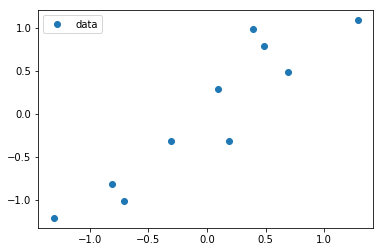

In [28]:
plt.plot(centered_d[:, 0], centered_d[:, 1], 'o', label = 'data')
plt.legend()
plt.show()

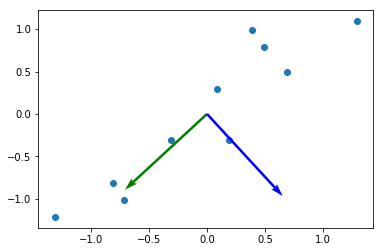

In [29]:
plt.scatter(centered_d[:, 0], centered_d[:, 1]) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
origin = [0], [0] 
plt.quiver(*origin, eigvectors[:,0], eigvectors[:,1],color=['g','b'], scale=3) # https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib
plt.show()

In [30]:
eigvectors[:,0] # 첫번째 축이 세로, 두번째가 가로
# 위에서 파란색을 의미

array([-0.73517866,  0.6778734 ])

In [31]:
eigvectors[:,1]
# 위에서 초록색을 의미

array([-0.6778734 , -0.73517866])

## PC를 사용해서 새로운 데이터 구축하기

component를 하나만 사용하는 경우

In [32]:
F = eigvectors[:,1]

In [33]:
F.shape

(2,)

In [40]:
new_data = np.dot(F, centered_d.T)

In [41]:
new_data

array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

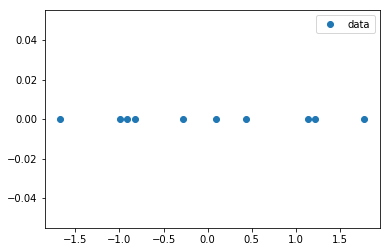

In [42]:
plt.plot(new_data,np.zeros(10), 'o', label = 'data')
plt.legend()
plt.show()

component를 둘 모두 사용하는 경우

In [53]:
F2 = np.array([eigvectors[:,1],eigvectors[:,0]])

In [54]:
F2

array([[-0.6778734 , -0.73517866],
       [-0.73517866,  0.6778734 ]])

In [62]:
new_data2 = np.dot(F2.T, d_np.T).T

In [63]:
new_data2.shape

(10, 2)

In [64]:
new_data2

array([[-3.45911227, -0.21105048],
       [-0.85356176,  0.10692205],
       [-3.62333958,  0.34843981],
       [-2.9053525 ,  0.09448203],
       [-4.3069435 , -0.24543364],
       [-3.54409119,  0.13934727],
       [-2.53203265, -0.38575987],
       [-1.48656992,  0.01048208],
       [-2.19309595, -0.01817055],
       [-1.40732153, -0.19861046]])

mean centering 된 값을 이용하는 경우

In [85]:
new_data_center = np.dot(F2.T, centered_d.T).T

In [86]:
new_data_center

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

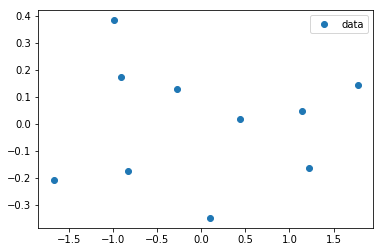

In [89]:
plt.plot(new_data_center[:, 0], new_data_center[:, 1], 'o', label = 'data')
plt.legend()
plt.show()